In [125]:
import scipy as sp
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix, csc_matrix 
from scipy.sparse import diags
from scipy.sparse import  spdiags
import numpy as np
from matplotlib.pylab import *
from numpy import linalg as la
import sys

In [126]:
# On definie les paramètres
eps = 0.001#float(input("Saisir epsilon : "))

N = 4
t0 = 0
T = 1
alpha =1.
beta = 2.718281828
h = (T-t0) / (N+1)
hh = h*h                                                
x0 = np.zeros(N).T

In [127]:
# On créer le vecteur x des points d'évaluations
x = np.zeros(N)
for i in range(1,N+1) : 
    x[i-1] = t0 + i*h

In [128]:


                       # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Pour le vecteur B~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def vect_b(n):
    v=1/(h*h)  
    b=np.zeros(n)
    b[0]=1
    b[n-1]=np.exp(1)
    b1=-v*b
    return b1

b=vect_b(N)
print(b)

[-25.          -0.          -0.         -67.95704571]


In [129]:
                  # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Création de la matrice A~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


A = 1/hh*((-2.-hh)*np.eye(N)  + np.diag(np.ones(N-1),-1) + np.diag(np.ones(N-1),1))
print(A)



[[-51.  25.   0.   0.]
 [ 25. -51.  25.   0.]
 [  0.  25. -51.  25.]
 [  0.   0.  25. -51.]]


In [130]:
print("Memory utilised (bytes): ", sys.getsizeof(A))
print("Memory utilised (bytes): ", sys.getsizeof(b))

Memory utilised (bytes):  256
Memory utilised (bytes):  144


In [ ]:
# def jacobi_(A, b, x0, eps, itmax):
#     it = 0
#     err = np.linalg.norm(b - A.dot(x0))
#     x_old = x0
#     n = len(A)
#     x = np.zeros(n)
#     while err > eps and it < itmax:
#         for i in range(n):
#             S = 0
#             for j in range(i):
#                 S += A[i][j] * x_old[j]
#             for j in range(i + 1, n):
#                 S += A[i][j] * x_old[j]
#             x[i] = (b[i] - S) / A[i][i]
#         x_old = x
#         err = np.linalg.norm(b - A.dot(x))
#         it += 1
#     return x

In [ ]:
# print("~~~~~~~~~~~~~~~~~~~La solution approchée~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# print("Jacobi :", jacobi_(A, b1, x0, eps, itmax))


In [131]:
#spa= csc_matrix(A)
#print(spa)

In [132]:
                    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~La solution approchée ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


u= np . linalg . solve (A, b)
print(u)

[1.22176995 1.49241069 1.82274786 2.22599495]


In [133]:
               # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~   La solution exacte ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 
ex=np.exp(x)
print("la solution exacte",ex)

hfhfhdjjd [1.22140276 1.4918247  1.8221188  2.22554093]


In [134]:
err=abs(u-ex)
print(err)

[0.00036719 0.00058599 0.00062906 0.00045402]


l'erreur est  [0.00036719 0.00058599 0.00062906 0.00045402]


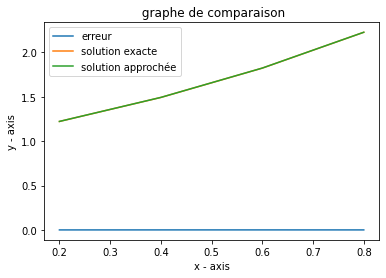

In [135]:
print("l'erreur est ",err)
plt.plot(x,err,label="erreur")
plt.plot(x, ex,label="solution exacte")
plt.plot(x,  u,label="solution approchée")
  
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title(' graphe de comparaison')
  
plt.legend()
plt.show()